### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset and subset columns

In [2]:
houseprice_data = pd.read_csv("data/HousingPricesData.csv")

In [3]:
houseprice_data = houseprice_data[['Price', 'Area', 'Room']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
houseprice_data.head()

,Price,Area,Room
0,685000.0,64,3
1,475000.0,60,3
2,850000.0,109,4
3,580000.0,128,6
4,720000.0,138,5


In [5]:
houseprice_data.shape

(924, 3)

#### Identify Univariate Quantile Thresholds

In [6]:
floor_thresh = houseprice_data['Price'].quantile(0.10)
cap_thresh = houseprice_data['Price'].quantile(0.90)
print(floor_thresh,cap_thresh)

285000.0 1099100.0


#### Perform Flooring and Capping on Univariate Outliers

In [7]:
houseprice_data['Adjusted_Price'] = houseprice_data.loc[:,'Price']
houseprice_data.loc[houseprice_data['Price'] < floor_thresh, 'Adjusted_Price'] = floor_thresh
houseprice_data.loc[houseprice_data['Price'] > cap_thresh, 'Adjusted_Price'] = cap_thresh

#### Visualise the Floored and Capped Dataset

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

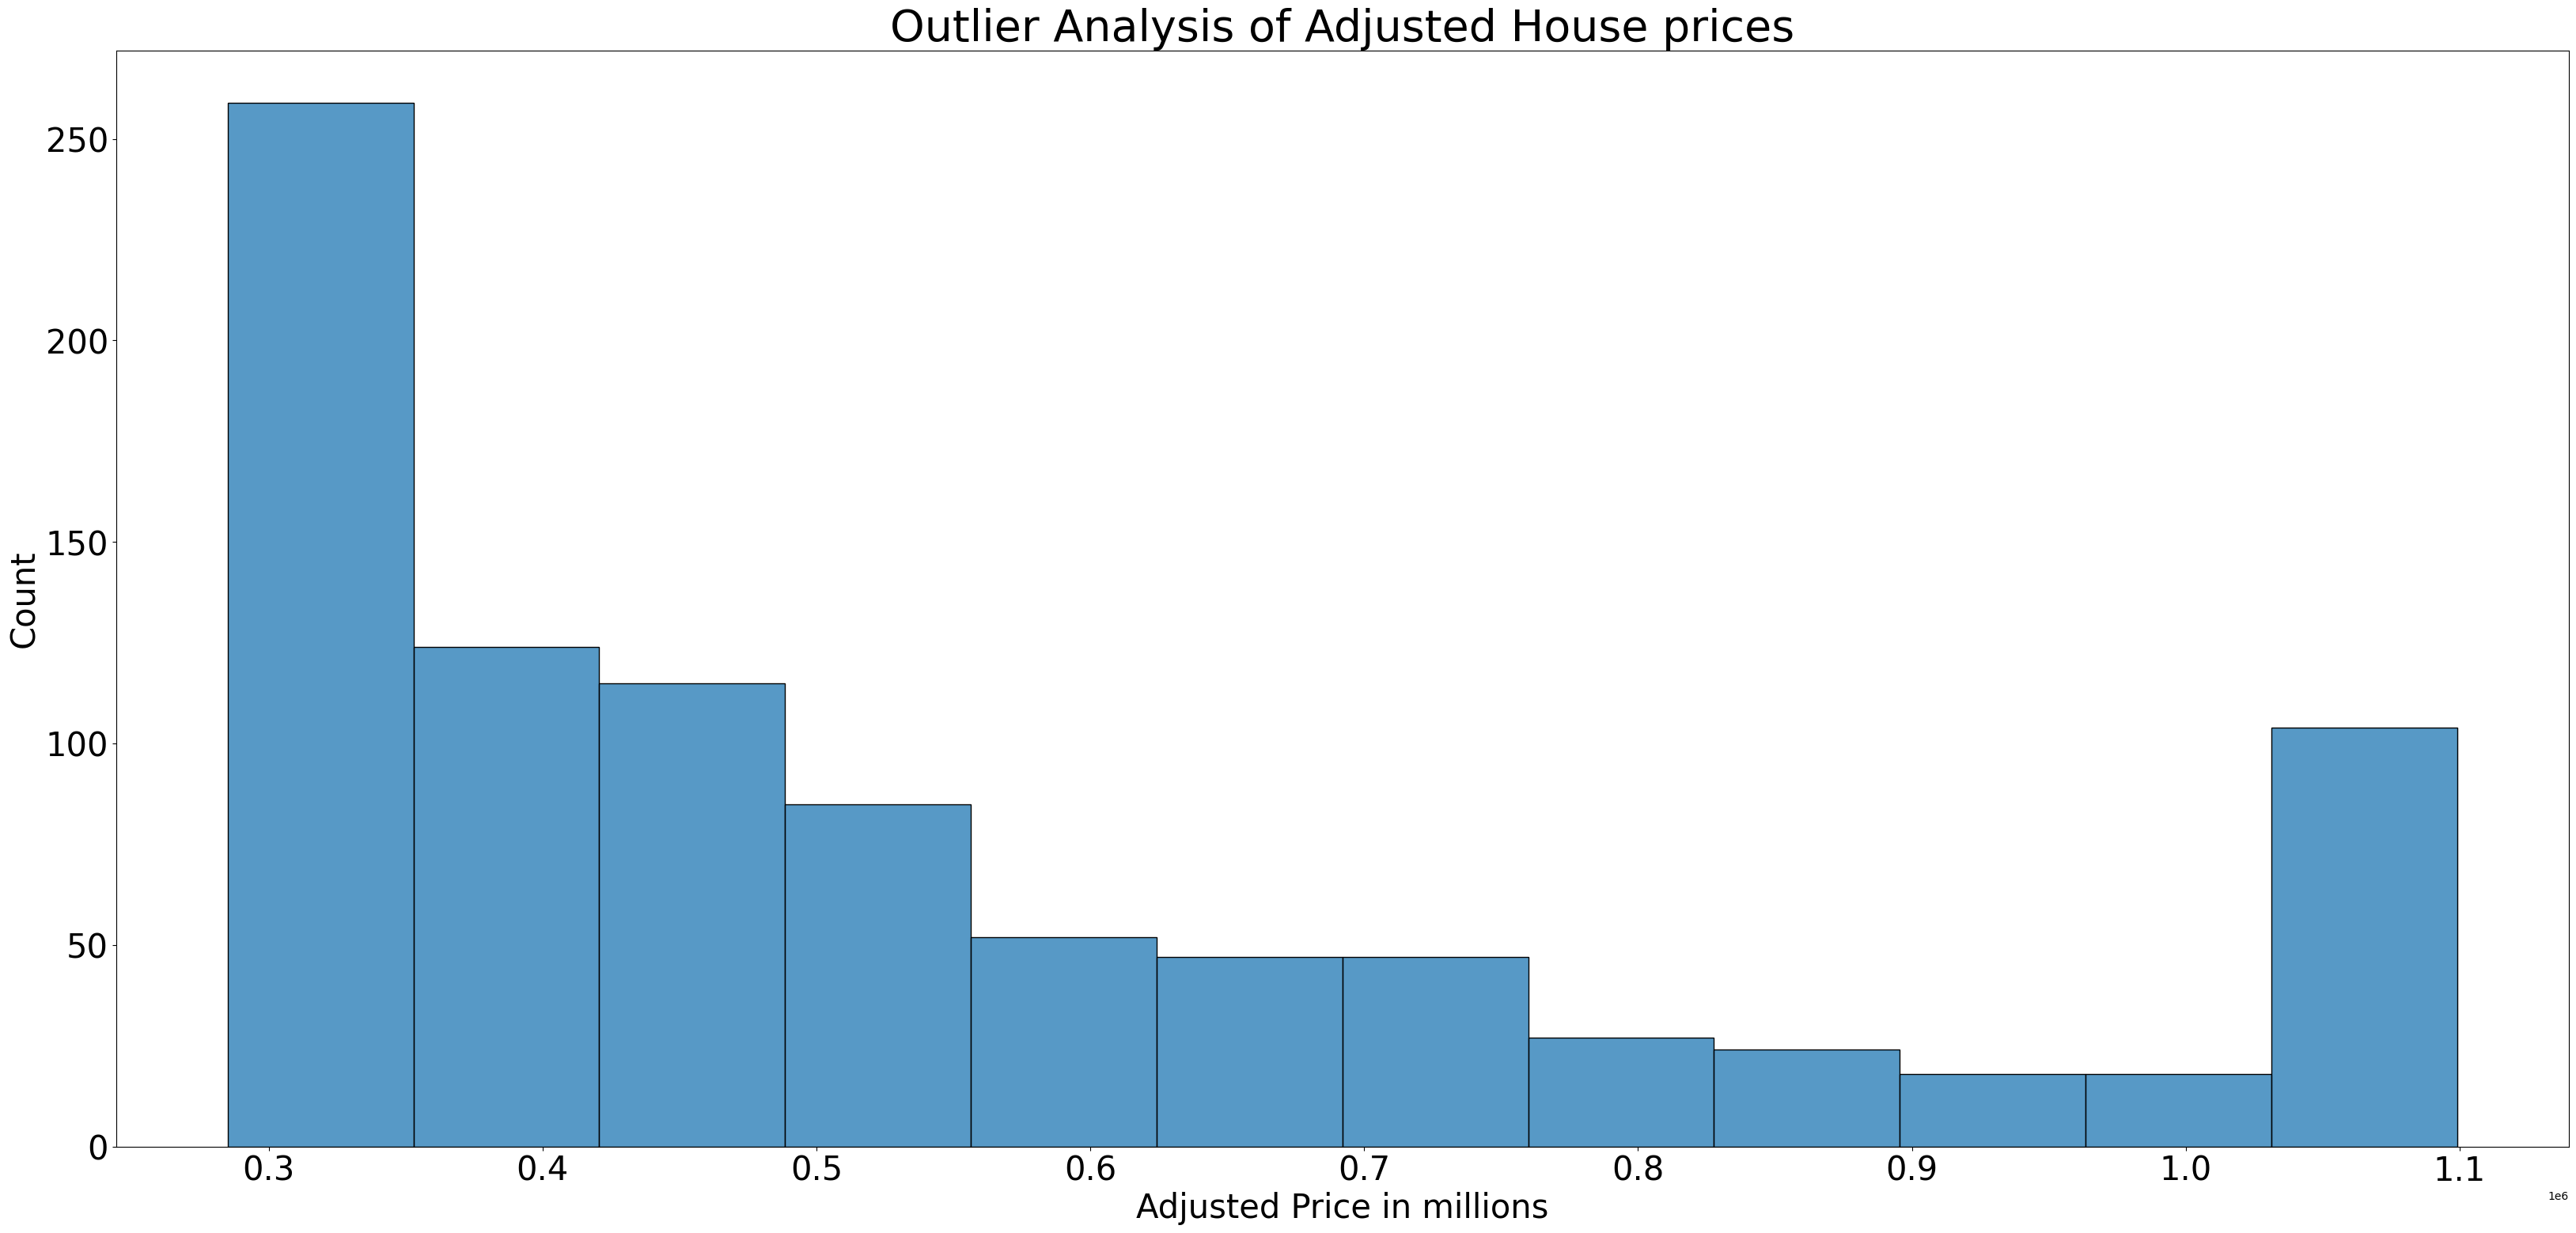

In [8]:
plt.figure(figsize = (40,18))

ax = sns.histplot(data= houseprice_data, x= 'Adjusted_Price')
ax.set_xlabel('Adjusted Price in millions',fontsize = 30)
ax.set_title('Outlier Analysis of Adjusted House prices', fontsize = 40)
ax.set_ylabel('Count',  fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


#### Perform Group Flooring and Capping

In [9]:
houseprice_data['90_perc'] = houseprice_data.groupby('Room')['Price'].transform(lambda x: np.nanpercentile(x,90))
houseprice_data['10_perc'] = houseprice_data.groupby('Room')['Price'].transform(lambda x: np.nanpercentile(x,10))

c:\users\ay_de\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


#### Perform Flooring and Capping on Contextual Outliers

In [10]:
houseprice_data['Group_Adjusted_Price'] = houseprice_data.loc[:,'Price']
houseprice_data.loc[houseprice_data['Price'] < houseprice_data['10_perc'], 'Group_Adjusted_Price'] = houseprice_data['10_perc']
houseprice_data.loc[houseprice_data['Price'] > houseprice_data['90_perc'], 'Group_Adjusted_Price'] = houseprice_data['90_perc']

#### Visualise the Floored and Capped Dataset

Text(0.5, 1.0, 'Bivariate Outlier Analysis of Adjusted House prices and Rooms')

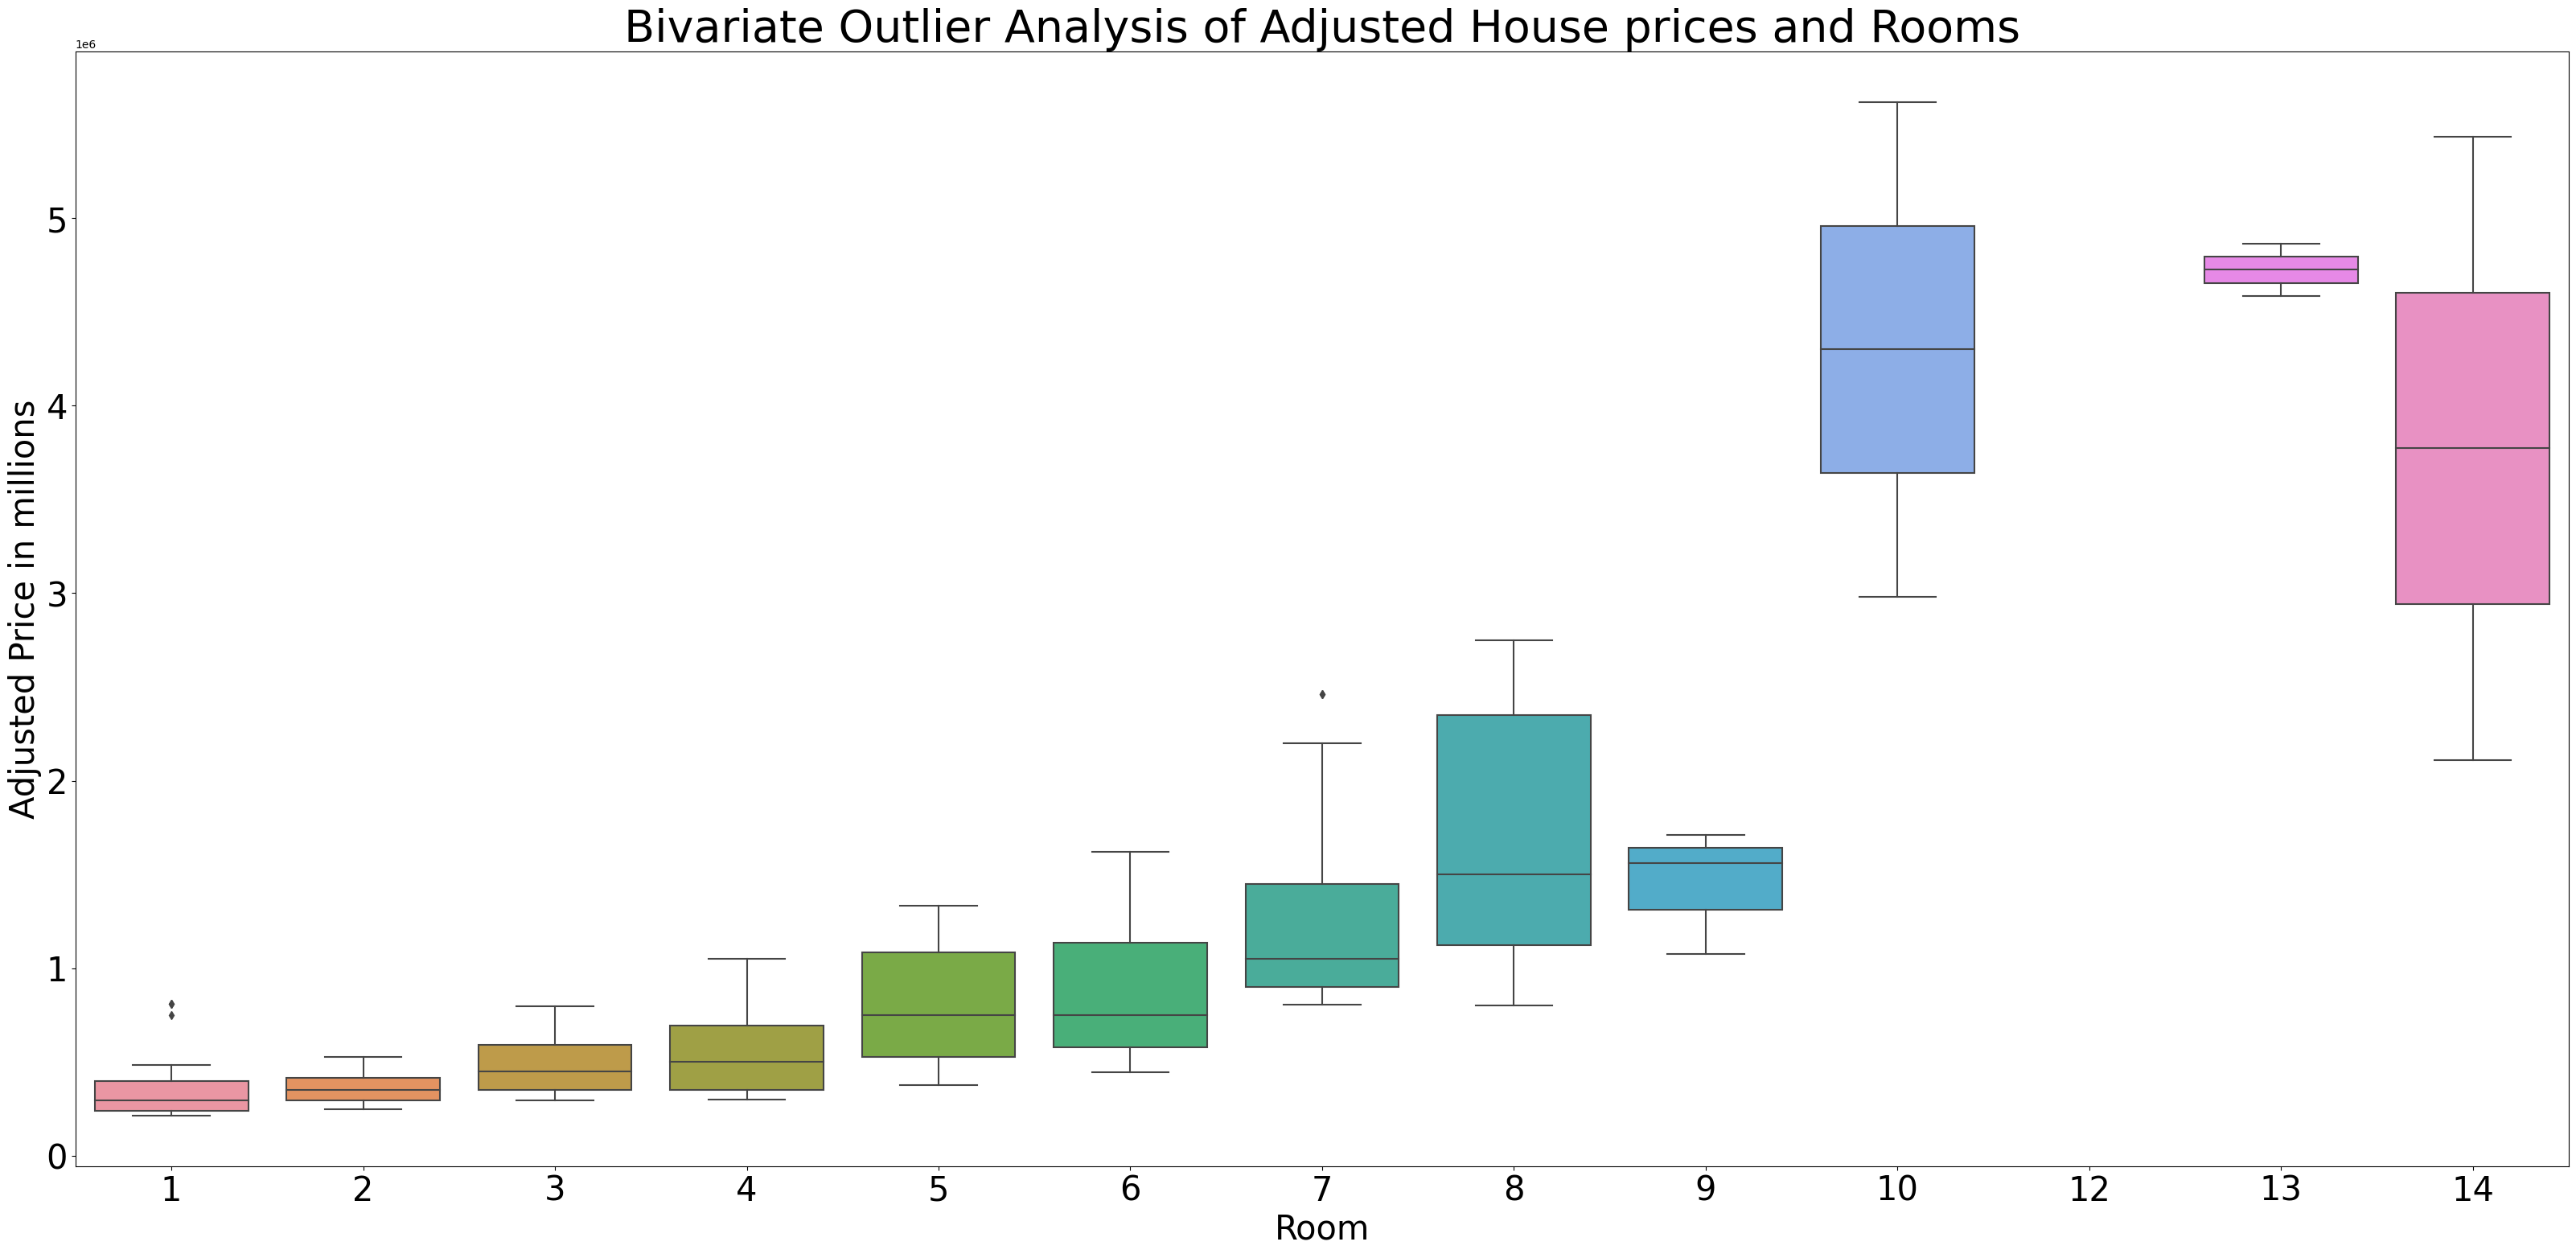

In [11]:
plt.figure(figsize = (40,18))

ax = sns.boxplot(data= houseprice_data,x = 'Room', y= 'Group_Adjusted_Price')
ax.set_xlabel('Room', fontsize = 30)
ax.set_ylabel('Adjusted Price in millions',  fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_title('Bivariate Outlier Analysis of Adjusted House prices and Rooms', fontsize = 40)